# Source free series circuit
Last update: 9 May 2022  

In this notebook, the Python modules SymPy and SciPy are used to solve for currents and voltages in a series R, L and C circuit from the characteristic differential equation.

A source free series RLC circuit consists of a resistor, capacitor and inductor connected in series with some initial energy stored either in the inductor, capacitor or both. Since the circuit is a single loop, the current flowing around the loop is the same current in each component. Both parallel and series connected circuits are usually presented in electrical circuit analysis classes. The two textbooks I used while in college presented the parallel connected circuit in some detail then kind of glossed over the series connect circuit since it is the dual of the other. The circuit to be analyzed is shown below and was drawn using EasyEDA, the link to the schematic is [here](https://easyeda.com/editor#mode=sim,id=|6b1460bfe8ec4872b7d7fd3038f38331|82658727399e487c94ebe177746e0ba0|ea67be55cc5c49f288edfa4ed837b1f0|8ea3b89798114238a453a1c678008c07|bef561e1caa74d498d621a82362fc683|3b000d947aad4568aba52d9cefa5715c|6d4bde5f240f4f55b15aaeee1ee6dc47).  

![schematic](Sch_series_RLC.png)

Notice that the component values are not shown, nor is there a reference node indicated. Once we write the circuit equation we can do the math symbolically with SymPy. Or we can can solve the differential equation numerically with SciPy. This notebook will look at SymPy and SciPy based solutions for the voltage and currents in the circuit. Initial conditions will be either the voltage on the capacitor or the current in the loop.

The following Python libraries are used. NumPy is the fundamental package for scientific computing in Python. SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. SymPy is a Python library for symbolic mathematics. The init_printing() function will allow the Jupyter notebook to render equations in the best format.

In [144]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sympy import *
init_printing()

## SymPy solution, given $i(t)=1$ and $i'(t)=0$ at $t=0$
The current at t=0 is 1 amp and the derivative of the current at t=0 is 0. The initial conditions are needed to solve for the constants as shown later. By use of Kirchhoff's current law, the current around the loop is the same current flowing in each component and the sum of the potential differences (voltages) around the loop is zero.

Within SymPy we can declare variable, t, for time and tell Sympy that t is only positive. Also, we can define the function i(t) as the current in the loop by using the class sympy.core.function.Function.

In [145]:
t = symbols('t',positive=True)  # t > 0
i = Function('i')(t)

The symbols L, R and C are used for inductance, resistance and capacitance. 

In [146]:
L, R, C = symbols('L R C')

The voltage current relation of the components in the circuit is defined as follows: The voltage across the resistor is defined by Ohm's law and is $Ri(t)=v(t)$. An inductor is an electrical component that stores energy in a magnetic field when electric current flows through it. The voltage across the terminals is the derivative of the current, $L\frac{d}{dt}i(t)=v(t)$. A capacitor is a device that stores energy in an electric field. The terminal voltage is defined by $\frac{1}{C}\int_0^{\tau}{i(t)}dt=v(t)$.

The sum of voltages on each of the components around the loop is equal to zero and the equation is written as: $L\frac{d}{dt}i(t)+Ri(t)+\frac{1}{C}\int_0^{\tau}{i(t)}dt=0$

When both sides are differentiated with respect to time the result is a homogeneous differential equation. The unknown function is the current i(t) and the solution to the differential equation is the natural response.

The variable zero is defined as a constant so that it can be included in the SymPy equation and differentiated without SymPy returning an error.

In [147]:
zero = symbols('zero',constant = True)

loop_voltage is the differential equation that says the sum of the voltages around the loop is equal to zero.

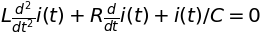

In [148]:
loop_voltage = Eq((L*i.diff(t)+R*i+Integral(i,t)/C).diff(t),(zero).diff(t))
loop_voltage

The SymPy function [dsolve](https://docs.sympy.org/latest/modules/solvers/ode.html) is used to find the solution to most kinds of ordinary differential equations and systems of ordinary differential equations. Except for the evaluation of the constants, C1 and C2, the current in the loop as a function of time is shown below.

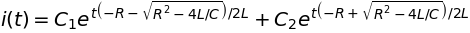

In [149]:
loop_current = dsolve(loop_voltage,i)
loop_current

At t=0, the loop current is 1 amp as stated above. The following line of Python code evaluates the right hand side (using args[1]) of the loop current equation at time zero (subs({t:0})) and equates it to 1 amp. 

In [150]:
Eq(loop_current.args[1].subs({t:0}),1)

The derivative of the loop current is evaluated at t=0 and the result is set equal to zero. This is written as an equation using the following python code.

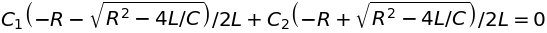

In [151]:
Eq(loop_current.args[1].diff(t).subs({t:0}),0)

The symbols C1 and C2 are declared for the constants in the solution for the differential equation and evaluation of the loop current equation at t=0 and the derivative at t=0 are put into matrix form as shown below. 

In [152]:
C1, C2 = symbols('C1 C2')
Matrix(
    [[Eq(loop_current.args[1].subs({t:0}),1)],
    [Eq(loop_current.args[1].diff(t).subs({t:0}),0)]])

⎡                      C₁ + C₂ = 1                      ⎤
⎢                                                       ⎥
⎢   ⎛         __________⎞      ⎛         __________⎞    ⎥
⎢   ⎜        ╱  2   4⋅L ⎟      ⎜        ╱  2   4⋅L ⎟    ⎥
⎢C₁⋅⎜-R -   ╱  R  - ─── ⎟   C₂⋅⎜-R +   ╱  R  - ─── ⎟    ⎥
⎢   ⎝     ╲╱         C  ⎠      ⎝     ╲╱         C  ⎠    ⎥
⎢──────────────────────── + ──────────────────────── = 0⎥
⎣          2⋅L                        2⋅L               ⎦

The Sympy function solve can be used to find a solution to these two equations and two unknowns.

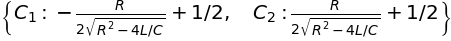

In [153]:
const = solve(Matrix(
    [[Eq(loop_current.args[1].subs({t:0}),1)],
    [Eq(loop_current.args[1].diff(t).subs({t:0}),0)]]),[C1, C2])

const

Substituting the constants back into the loop current equation we get the solution in symbolic form. 

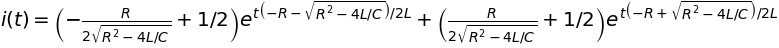

In [154]:
loop_current.subs(const)

Going future requires some numeric values for R, L and C. If the values of R, L and C produce a negative square root, then the natural response is called underdamped because the current waveform is a decaying sinusoidal wave. Values of R, L and C that don't have an imaginary exponent produce a natural response that is called overdamped. Examples of the underdamped and overdamped responses are shown below.

Engineering text books usually define the resonant frequency and the damping coefficient, then define the over, under and critically damped conditions in terms of the resonant frequency and the damping coefficient as follows:

Resonant frequency: $\omega_o=\frac {1} {\sqrt{LC}}$, the frequency at which a system tends to oscillate in the absence of a driving force.

Damping coefficient: $\alpha = \frac {R}{2RL}$, a  measure describing how oscillations in a system decay. 

Overdamped: $\alpha > \omega_o$, the response is the sum of two decaying exponentials with no oscillation.

Critically damped: $\alpha = \omega_o$,  the response sits on the border between the overdamped and underdamped cases.

Under damped:  $\alpha < \omega_o$, the response is a decaying sinusoidal wave and has a frequency of $\omega_d = \sqrt{\omega_o^2 + \alpha^2}$

## Over damped response
The condition for the overdamped response is satisfied by, $\frac{R}{2L}>\frac{1}{\sqrt{LC}}$. Choosing R=6, L=4 and C=1 will produce an overdamped response. The element values are assigned to the symbols with the dictionary data type, which are used to store data values in key:value pairs.

In [155]:
ele_values = {R:6,L:4,C:1}

Using the SymPy operator evalf() to convert to floating point.

In [156]:
alpha = (R/(2*L)).subs(ele_values)
print('alpha = {:.2f}'.format(alpha.evalf()))

w_o = (1/sqrt(L*C)).subs(ele_values)
print('natural frequency = {:.2f}, rad/s'.format(w_o.evalf()))

print('alpha > natural frequency = {:s}'.format(str(alpha > w_o)))

alpha = 0.75
natural frequency = 0.50, rad/s
alpha > natural frequency = True


Substituting the constants and the component values we get the following equation.

In [157]:
loop_current.subs(const).subs(ele_values)

The module lambdify is used to transform SymPy expressions to lambda functions which can be used to calculate numerical values.

In [158]:
func_current = lambdify(t, loop_current.subs(const).subs(ele_values).args[1]) 

The plot below shows the loop current in amps versus time. The response is a smoothly decreasing function from the initial condition of 1 amp. The lambdify function returns complex numbers and both real and imaginary parts are plotted. The imaginary values are zero. 

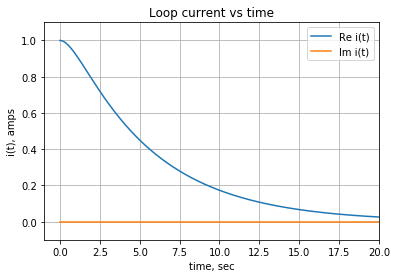

In [159]:
x = np.linspace(0, 20, 1000, endpoint=True)
#dx = 0.1
#x = np.arange(0,20,dx)

plt.title('Loop current vs time')

#plt.plot(x, func_current(x))
plt.plot(x, np.real(func_current(x)),label='Re i(t)')
plt.plot(x, np.imag(func_current(x)),label='Im i(t)')

plt.ylabel('i(t), amps')
plt.xlabel('time, sec')
plt.ylim((-0.1,1.1))
plt.xlim((-1,20))
plt.legend()
plt.grid()
plt.show()

## Under damped response
Choosing R=0.5, L=1 and C=0.1 will produce an under damped response.

$\frac{R}{2L}<\frac{1}{\sqrt{LC}}$

The component values are assigned below.

In [160]:
ele_values = {R:0.5,L:1.0,C:0.1}

In [161]:
alpha = (R/(2*L)).subs(ele_values)
print('alpha = {:.2f}'.format(alpha.evalf()))

w_o = (1/sqrt(L*C)).subs(ele_values)
print('natural frequency = {:.2f}, rad/s'.format(w_o.evalf()))

print('alpha < natural frequency = {:s}'.format(str(alpha < w_o)))

alpha = 0.25
natural frequency = 3.16, rad/s
alpha < natural frequency = True


Substitute the constants and component values we get the following equation.

In [162]:
loop_current.subs(const).subs(ele_values)

In [163]:
func_current = lambdify(t, loop_current.subs(const).subs(ele_values).args[1]) 

The plot below shows the loop current in amps versus time. The response is a decaying sinusoidal waveform from the initial condition of 1 amp. The lambdify function returns complex numbers and both real and imaginary parts are plotted. The imaginary values are zero. 

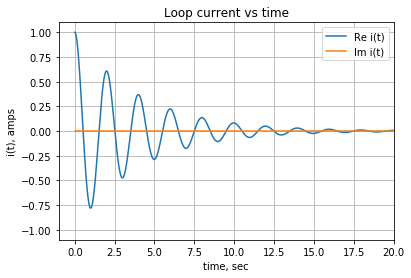

In [164]:
plt.title('Loop current vs time')

plt.plot(x, np.real(func_current(x)),label='Re i(t)')
plt.plot(x, np.imag(func_current(x)),label='Im i(t)')

plt.ylabel('i(t), amps')
plt.xlabel('time, sec')
plt.ylim((-1.1,1.1))
plt.xlim((-1,20))
plt.legend()
plt.grid()
plt.show()

The plot above was verified by comparing the results with LTspice simulation of the same circuit.

## Solving for other circuit variables
The voltages across each of the components can be computed since the current has been solved for. The initial condition for the current at t=0 is 1 amp. Also the derivative of the current at t=0 is 0, which will be used when calculating the voltage across the inductor. At t=0, the current flowing through the capacitor is 1 amp, which causes a voltage across the resistor of 0.5 volts.  

The voltages around the loop must sum to zero, so this means one of the components must have a negative voltage with respect to the others for the sum to be zero. Since the inductor's voltage is related to the derivative of the current and at t=0, i'(0)=0, the inductor has no voltage across its terminals. The capacitor can have an initial voltage on its terminals, which has not been defined, but since the voltages must sum to zero, the initial voltage on the capacitor must be -0.5 volts.

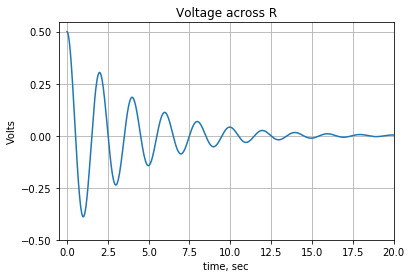

In [165]:
# voltage across the resistor
R_voltage = ele_values[R]*np.real(func_current(x))

plt.title('Voltage across R')
plt.plot(x,R_voltage)

plt.ylabel('Volts')
plt.xlabel('time, sec')

#plt.ylim((-1,1))
plt.xlim((-0.5,20))
plt.yticks(np.arange(-0.5, 0.75, 0.25))
#plt.xticks(np.arange(0, 20+1, 2.0))
#plt.legend()
plt.grid()
plt.show()

Voltage across the [inductor](https://en.wikipedia.org/wiki/Inductor) is calculated by: $L\frac{d}{dt}i(t)=v(t)$ There is no initial voltage because i'(0)=0. 

NumPy does not provide general functionality to compute derivatives so we will use the gradient function and supply the spacing between the samples.

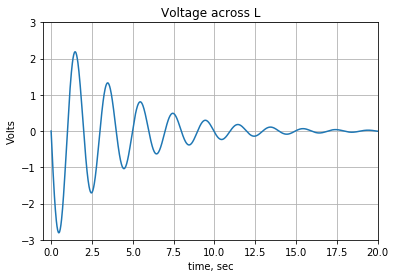

In [166]:
L_voltage = ele_values[L]*np.gradient(np.real(func_current(x)),x[1])
L_voltage[0] = 0 # make v(0) = 0 

plt.title('Voltage across L')
plt.plot(x, L_voltage)

plt.ylabel('Volts')
plt.xlabel('time, sec')

plt.ylim((-3,3))
plt.xlim((-0.5,20))
#plt.yticks(np.arange(-2.5, 3.1, 0.5))
#plt.xticks(np.arange(0, 20+1, 2.0))
#plt.legend()
plt.grid()
plt.show()

The voltage across the [capacitor](https://en.wikipedia.org/wiki/Capacitor) is given by: $\frac{1}{C}\int_0^{\tau}{i(t)}dt+v(0)=v(t)$. As described above, $v(0)=-0.5$

The code below calculates the integral of the current using the numpy function [trapz](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html), which uses the composite trapezoidal rule to approximate integration.

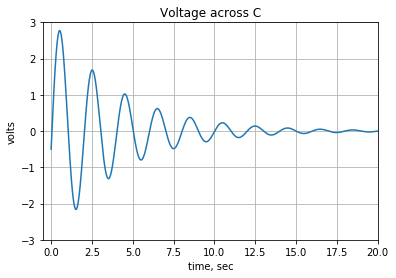

In [167]:
integral_of_current = np.zeros(len(x))
for k in range(len(x)):
    integral_of_current[k] = np.trapz(np.real(func_current(x[0:k+1])),x=None,dx=x[1])

C_voltage = integral_of_current/ele_values[C] -  ele_values[R]*np.real(func_current(0))

plt.title('Voltage across C')

plt.plot(x, C_voltage )

plt.ylabel('volts')
plt.xlabel('time, sec')
plt.ylim((-3,3))
plt.xlim((-0.5,20))
#plt.yticks(np.arange(-2.5, 3, .5))
#plt.xticks(np.arange(0, 20+1, 2.0))
#plt.legend()
plt.grid()
plt.show()

## Sum the voltages around the loop
To check the results we can sum the voltages around the loop and the result should be zero, or approximately zero.

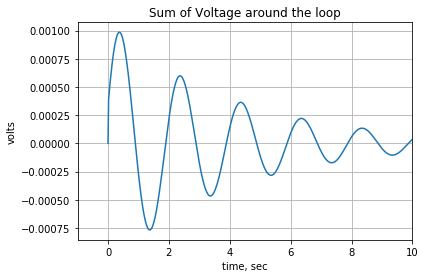

In [168]:
plt.title('Sum of Voltage around the loop')

plt.plot(x, R_voltage + L_voltage + C_voltage)

plt.ylabel('volts')
plt.xlabel('time, sec')
#plt.ylim((-.1,.1))
plt.xlim((-1,10))
#plt.yticks(np.arange(-2.5, 3, .5))
#plt.xticks(np.arange(0, 20+1, 2.0))
#plt.legend()
plt.grid()
plt.show()

The sum of the voltages are almost zero, but not quite, probably because of round off errors in the integration and differentiation. Investigation of the error could be the subject of a different effort or maybe a future update to this notebook.

## SciPy solution
Using SciPy to numerically solve for the current in the series circuit. The differential equation needs to be re-formulated because SciPy can only solve first order equations. The differential equation $𝐿\frac{𝑑^2}{𝑑𝑡^2}𝑖(𝑡)+𝑅\frac{𝑑}{𝑑𝑡}𝑖(𝑡)+\frac{𝑖(𝑡)}{𝐶}=0$ is rewritten by multiplying the terms by C, $𝐿C\frac{𝑑^2}{𝑑𝑡^2}𝑖(𝑡)+𝑅C\frac{𝑑}{𝑑𝑡}𝑖(𝑡)+𝑖(𝑡)=0$. 

The shorthand notation for the derivative of the current is used: $𝐿Ci''+𝑅Ci'+𝑖=0$.

Rearrange the equation to put the second derivative of i on the left hand side: $i''=\frac {-Ri'-i}{CL}$  

A new variable $z$ is introduced $z = i'$ along with its derivative $z'=i''$  

Substituting the expression for z and z' back into the original equation, we get the following two equations. 

$z' =\frac {-RCz-i}{CL}$  

$z=i'$

These are then written into a Python function called circuit_model.

In [169]:
def circuit_model(I, t):
    R = 0.5 # resistor value
    L = 1.0 # inductor value
    C = 0.1 # capacitor value
    i = I[0] # the current variable
    z = I[1] # 
    didt = z # the equation from above
    dzdt = (-C*R*z-i)/(L*C) # 
    return [didt, dzdt]

The initial conditions

In [170]:
t0 = 0 # t starts at zero
i0 = 1 # current at t=0
z0 = 0
I0 = [i0, z0]

Using the SciPy function [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) to solve the differential equation. Odeint computes the derivative of the function at t. 

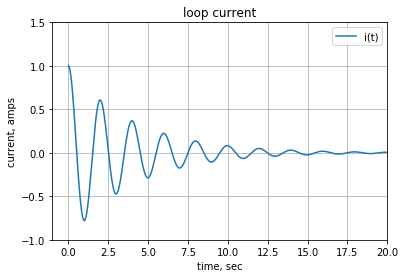

In [171]:
t = np.linspace(0, 20,num=1000)
loop_current = odeint(circuit_model, I0, t)

plt.title('loop current')
plt.plot(t, loop_current[:,0], label='i(t)')
plt.ylabel('current, amps')
plt.xlabel('time, sec')
plt.ylim((-1,1.5))
plt.xlim((-1,20))
#plt.yticks(np.arange(-2.5, 3, .5))
#plt.xticks(np.arange(0, 20+1, 2.0))
plt.legend()
plt.grid()
plt.show()

The SciPy solution is compared against the SymPy solution by taking the difference in the calculated loop current. The difference is shown below.

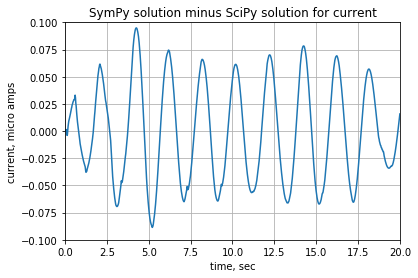

In [172]:
plt.title('SymPy solution minus SciPy solution for current')
plt.plot(t, (loop_current[:,0]-np.real(func_current(x)))*1e6)
plt.ylabel('current, micro amps')
plt.xlabel('time, sec')
plt.ylim((-0.1,0.1))
plt.xlim((0,20))
#plt.yticks(np.arange(-0.1, 0.1, .05))
#plt.xticks(np.arange(0, 20+1, 2.0))
#plt.legend()
plt.grid()
plt.show()

The difference between the computed currents is less than 0.1 micro amps, which is probably small enough to ignore. 

## SymPy solution, given $Vc(t)=1$ and $Vc'(t)=0$ at $t=0$
If the initial condition for the series circuit has the voltage on the capacitor given, then the circuit equations can be solved as follows. Declare the variable, t, for time and define it to be positive. Define a function, v, for the voltage across the capacitor and make it time dependent.

In [173]:
t = symbols('t',positive=True)  # t > 0
v = Function('v')(t)

The symbols L, R and C used for inductance, resistance and capacitance were declared above.

The current through the capacitor is equal to the derivative of the voltage, $C\frac{d}{dt}v(t)=i(t)$. The voltage across the series L and R is $L\frac{d}{dt}i(t)+Ri(t)=-v(t)$, where v(t) is the voltage across the capacitor. Since the current is the same in the loop, the capacitor current can be substituted in the equation to give: $CL\frac{d^2}{dt^2}v(t)+CR\frac{d}{dt}v(t)=-v(t)$  
The right hand side is negative since the voltage around the loop must sum to zero. The equation can be expressed in SymPy as: 

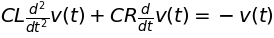

In [174]:
Eq(L*C*v.diff(t,t) + R*((C*v.diff(t))),  -v)

Using the SymPy function dsolve to find the capacitor voltage, we get:  

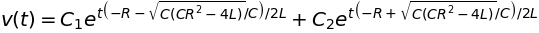

In [175]:
C_voltage = dsolve(Eq(L*C*v.diff(t,t) + R*C*v.diff(t), -v))
C_voltage

at t = 0, voltage on capacitor is 1

In [176]:
Eq(C_voltage.args[1].subs({t:0}),1)

derivative of the capacitor voltage is 0

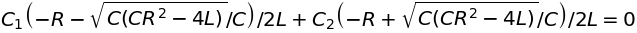

In [177]:
Eq(C_voltage.args[1].diff(t).subs({t:0}),0)

Using the two initial conditions, the constants can be solved for.

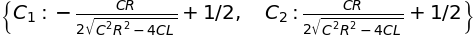

In [178]:
const = solve(Matrix(
    [[Eq(C_voltage.args[1].subs({t:0}),1)],
    [Eq(C_voltage.args[1].diff(t).subs({t:0}),0)]]),[C1, C2])
const

## Under damped response
As described above the underdamped case is defined as $\frac {R}{2RL} > \frac {1} {\sqrt{LC}}$. Choosing R=0.5, L=1 and C=0.1 will produce an under damped response.

Evaluating the equation numerically, the voltage on the capacitor is:

In [179]:
C_voltage.subs(const).subs(ele_values)

Using the SymPy function lambdify to turn the expression into a function: 

In [180]:
func_C_voltage = lambdify(t, C_voltage.subs(const).subs(ele_values).args[1]) 

Find the current in C by differentiating the voltage, $C\frac{d}{dt}v(t)=i(t)$

In [181]:
x = np.linspace(0, 20, 2000, endpoint=True)
current_in_C = ele_values[C]*np.gradient(np.real(func_C_voltage(x)),x[1])
current_in_C[0] = 0 # set the current in the capacitor to 0 at t=0

Find the voltage across the resistor, $Ri(t)$ and the voltage across the inductor, $L\frac{d}{dt}i(t)$. At t=0, there is no current flowing, so the initial voltage on the resistor is zero. The initial voltage on the capacitor of 1 volt, must be balanced by an initial voltage on the inductor.

In [182]:
R_voltage = ele_values[R]*current_in_C
L_voltage = ele_values[L]*np.gradient(current_in_C,x[1])
L_voltage[0] = -1 # set the voltage on the inductor at t=0

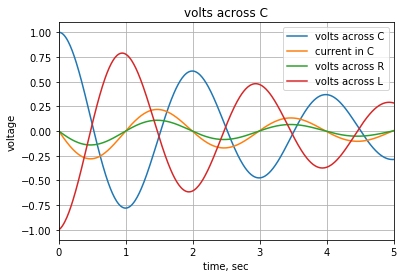

In [183]:
plt.title('volts across C')

plt.plot(x, np.real(func_C_voltage(x)),label='volts across C')
plt.plot(x, current_in_C, label='current in C')
plt.plot(x, R_voltage, label='volts across R')
plt.plot(x, L_voltage, label='volts across L')

plt.ylabel('voltage')
plt.xlabel('time, sec')
#plt.ylim((-3,3))
plt.xlim((0,5))
#plt.yticks(np.arange(-2.5, 3, .5))
#plt.xticks(np.arange(0, 20+1, 2.0))
plt.legend()
plt.grid()
plt.show()

Checking to see that the voltage sum around the loop is zero.

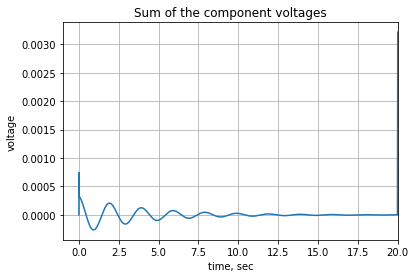

In [184]:
plt.title('Sum of the component voltages')

plt.plot(x, np.real(func_C_voltage(x)) + R_voltage + L_voltage)

plt.ylabel('voltage')
plt.xlabel('time, sec')
#plt.ylim((-3,3))
plt.xlim((-1,20))
#plt.yticks(np.arange(-2.5, 3, .5))
#plt.xticks(np.arange(0, 20+1, 2.0))
#plt.legend()
plt.grid()
plt.show()

The sum of the voltages almost is zero. Investigating the source of the error is a different topic.

## Summery
This notebook walked through the steps of using SymPy and SciPy to solve a 2nd order ordinary differential equation for a series connected LRC circuit. Both symbolic and numerical solutions were generated and the results were plotted. The SymPy and SciPy libraries are very versital and make these types of computations very easy. 

Electrical engineers don't normally solve circuit analysis problems by writing differential equations and solving them, Laplace transforms are used instead. 